In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pymatgen.core import Lattice, Structure, Composition
from pymatgen.vis.structure_vtk import StructureVis
from pymatgen.transformations import standard_transformations, site_transformations

In [82]:
original_structure = Structure.from_file("Y2SiO5-mp3520.cif").to_conventional()
for s in original_structure.sites:
    for kk in s.species._data:
        s.species._data[kk] = int(s.species._data[kk])  # fix a bug in pymatgen visualization

In [83]:
sites_1 = {}
for kk, s in enumerate(original_structure.sites):
    if s.species_string == "Y3+":
        max_bond_distance = 2.9  # 2.7 to 3.1 gives the correct numbers of neighbors (7 / 6).
        if len(original_structure.get_neighbors(s, max_bond_distance)) == 7:
            sites_1[kk] = "Eu3+"
original_structure = site_transformations.ReplaceSiteSpeciesTransformation(sites_1).apply_transformation(original_structure)

In [84]:
structure = standard_transformations.RotationTransformation([0, 0, 1], 90).apply_transformation(original_structure)

def rotate_around_b(vector, angle):
    rotation_matrix = np.array(
        [
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)],
        ]
    )
    return rotation_matrix @ vector

beta = 122.18778465 * np.pi / 180
a = np.array([-1, 0, 0]) * 14.43523963
b = np.array([0, 1, 0]) * 6.74280580
c = 10.42107312 * rotate_around_b(a / np.linalg.norm(a), -beta)

angle_D1 = -11.35 * np.pi / 180  # https://doi.org/10.1109/3.135248
angle_D2 = angle_D1 - np.pi / 2
D1 = rotate_around_b(a / 2, angle_D1)
D2 = rotate_around_b(a / 2, angle_D2)

def add_crystallographic_axes(vis):
    for D_, direction_ in {"a": a, "b": b, "c": c}.items():
        vis.add_line((0, 0, 0), direction_)
        vis.add_text(direction_, D_)

def add_dielectric_axes(vis):
    for D_, direction_ in {"D1": D1, "D2": D2}.items():
        vis.add_line((0, 0, 0) + a/2+c/2, direction_+a/2+c/2)
        vis.add_text(direction_+a/2+c/2, D_)

In [68]:
site_1_cart_coords = np.append(structure.cart_coords[:4], structure.cart_coords[8:12], axis=0)

In [69]:
site_1_cart_coords

array([[  4.830674  ,   5.02110525,  -8.5155887 ],
       [-10.93901991,   5.02110525,  -4.71354817],
       [-13.71465115,   1.72170055,  -0.30383588],
       [  2.05504276,   1.72170055,  -4.10587641],
       [ -2.38694582,   1.64970235,  -8.5155887 ],
       [ -3.7214001 ,   1.64970235,  -4.71354817],
       [ -6.49703134,   5.09310345,  -0.30383588],
       [ -5.16257706,   5.09310345,  -4.10587641]])

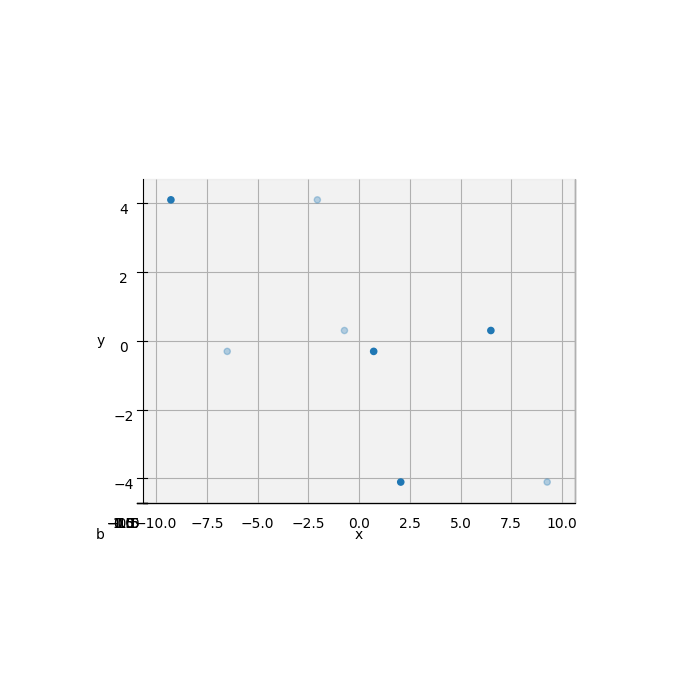

In [92]:
site_coords_x = [kk[0] for kk in site_1_cart_coords]
site_coords_y = [kk[2] for kk in site_1_cart_coords]
site_coords_b = [kk[1] for kk in site_1_cart_coords]
site_coords_x -= np.average(site_coords_x)
site_coords_y -= np.average(site_coords_y)
site_coords_b -= np.average(site_coords_b)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(site_coords_x, site_coords_b, site_coords_y)
ax.set_proj_type('ortho')
ax.view_init(elev=0, azim=270, roll=0)
ax.set_xlabel("x")
ax.set_ylabel("b")
ax.set_zlabel("y")
plt.tight_layout()
plt.show()

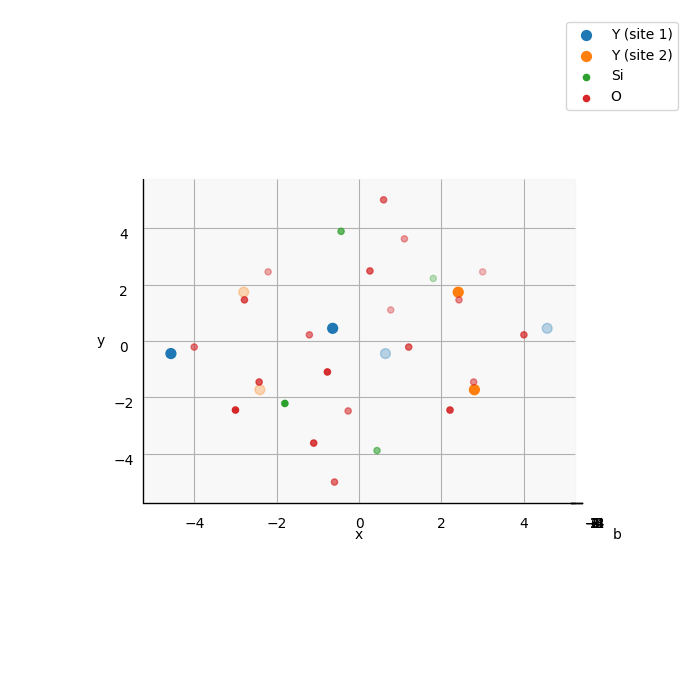

In [116]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(site_coords_primitive_x, site_coords_primitive_y, site_coords_primitive_b, color="C0", s=50, label="Y (site 1)")
ax.scatter(site_coords_2_primitive_x, site_coords_2_primitive_y, site_coords_2_primitive_b, color="C1", s=50, label="Y (site 2)")
ax.scatter(site_coords_si_primitive_x, site_coords_si_primitive_y, site_coords_si_primitive_b, color="C2", label="Si")
ax.scatter(site_coords_0_primitive_x, site_coords_0_primitive_y, site_coords_0_primitive_b, color="C3", label="O")
ax.set_proj_type('ortho')
ax.view_init(elev=0, azim=0, roll=0)
ax.set_xlabel("b")
ax.set_ylabel("x")
ax.set_zlabel("y")
ax.legend()
plt.tight_layout()
plt.show()

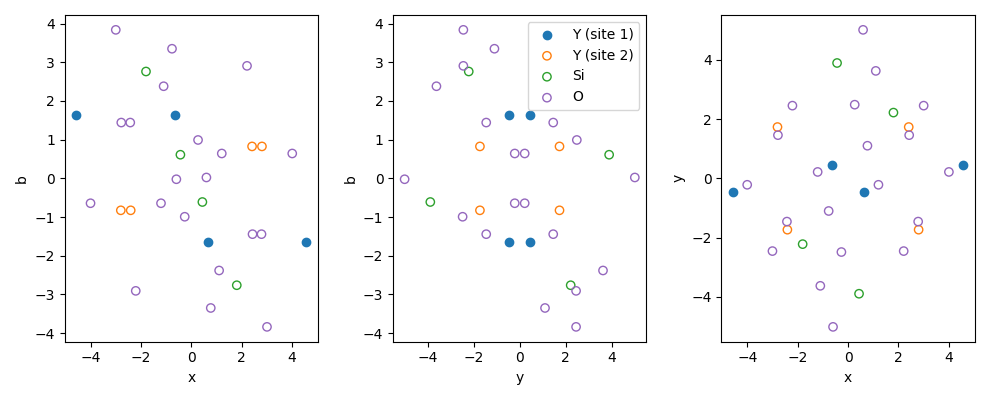

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].scatter(site_coords_primitive_y, site_coords_primitive_x, color="C0", label="Y (site 1)")
ax[0].scatter(site_coords_2_primitive_y, site_coords_2_primitive_x, color="C1", label="Y (site 2)", facecolor="none")
ax[0].scatter(site_coords_si_primitive_y, site_coords_si_primitive_x, color="C2", label="Si", facecolor="none")
ax[0].scatter(site_coords_0_primitive_y, site_coords_0_primitive_x, color="C4", label="O", facecolor="none")
ax[0].set_xlabel("x")
ax[0].set_ylabel("b")

ax[1].scatter(site_coords_primitive_b, site_coords_primitive_x, color="C0", label="Y (site 1)")
ax[1].scatter(site_coords_2_primitive_b, site_coords_2_primitive_x, color="C1", label="Y (site 2)", facecolor="none")
ax[1].scatter(site_coords_si_primitive_b, site_coords_si_primitive_x, color="C2", label="Si", facecolor="none")
ax[1].scatter(site_coords_0_primitive_b, site_coords_0_primitive_x, color="C4", label="O", facecolor="none")
ax[1].set_xlabel("y")
ax[1].set_ylabel("b")
ax[1].legend()

ax[2].scatter(site_coords_primitive_y, site_coords_primitive_b, color="C0", label="Y (site 1)")
ax[2].scatter(site_coords_2_primitive_y, site_coords_2_primitive_b, color="C1", label="Y (site 2)", facecolor="none")
ax[2].scatter(site_coords_si_primitive_y, site_coords_si_primitive_b, color="C2", label="Si", facecolor="none")
ax[2].scatter(site_coords_0_primitive_y, site_coords_0_primitive_b, color="C4", label="O", facecolor="none")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.tight_layout()
plt.savefig("primitive.pdf")
plt.show()

In [109]:
original_structure = Structure.from_file("Y2SiO5-mp3520.cif").get_primitive_structure()
for s in original_structure.sites:
    for kk in s.species._data:
        s.species._data[kk] = int(s.species._data[kk])  # fix a bug in pymatgen visualization

sites_1 = {}
for kk, s in enumerate(original_structure.sites):
    if s.species_string == "Y3+":
        max_bond_distance = 2.9  # 2.7 to 3.1 gives the correct numbers of neighbors (7 / 6).
        if len(original_structure.get_neighbors(s, max_bond_distance)) == 7:
            sites_1[kk] = "Eu3+"
original_structure = site_transformations.ReplaceSiteSpeciesTransformation(sites_1).apply_transformation(original_structure)

structure = standard_transformations.RotationTransformation([0, 0, 1], 90).apply_transformation(original_structure)

def rotate_around_b(vector, angle):
    rotation_matrix = np.array(
        [
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)],
        ]
    )
    return rotation_matrix @ vector

beta = 122.18778465 * np.pi / 180
a = np.array([-1, 0, 0]) * 14.43523963
b = np.array([0, 1, 0]) * 6.74280580
c = 10.42107312 * rotate_around_b(a / np.linalg.norm(a), -beta)

angle_D1 = -11.35 * np.pi / 180  # https://doi.org/10.1109/3.135248
angle_D2 = angle_D1 - np.pi / 2
D1 = rotate_around_b(a / 2, angle_D1)
D2 = rotate_around_b(a / 2, angle_D2)

def add_crystallographic_axes(vis):
    for D_, direction_ in {"a": a, "b": b, "c": c}.items():
        vis.add_line((0, 0, 0), direction_)
        vis.add_text(direction_, D_)

def add_dielectric_axes(vis):
    for D_, direction_ in {"D1": D1, "D2": D2}.items():
        vis.add_line((0, 0, 0) + a/2+c/2, direction_+a/2+c/2)
        vis.add_text(direction_+a/2+c/2, D_)

site_1_cart_coords_0_primitive = structure.cart_coords[:20]

site_coords_0_primitive_x = [kk[0] for kk in site_1_cart_coords_0_primitive]
site_coords_0_primitive_y = [kk[2] for kk in site_1_cart_coords_0_primitive]
site_coords_0_primitive_b = [kk[1] for kk in site_1_cart_coords_0_primitive]
site_coords_0_primitive_x -= np.average(site_coords_0_primitive_x)
site_coords_0_primitive_y -= np.average(site_coords_0_primitive_y)
site_coords_0_primitive_b -= np.average(site_coords_0_primitive_b)

site_1_cart_coords_si_primitive = structure.cart_coords[20:24]

site_coords_si_primitive_x = [kk[0] for kk in site_1_cart_coords_si_primitive]
site_coords_si_primitive_y = [kk[2] for kk in site_1_cart_coords_si_primitive]
site_coords_si_primitive_b = [kk[1] for kk in site_1_cart_coords_si_primitive]
site_coords_si_primitive_x -= np.average(site_coords_si_primitive_x)
site_coords_si_primitive_y -= np.average(site_coords_si_primitive_y)
site_coords_si_primitive_b -= np.average(site_coords_si_primitive_b)

site_1_cart_coords_primitive = structure.cart_coords[24:28]

site_coords_primitive_x = [kk[0] for kk in site_1_cart_coords_primitive]
site_coords_primitive_y = [kk[2] for kk in site_1_cart_coords_primitive]
site_coords_primitive_b = [kk[1] for kk in site_1_cart_coords_primitive]
site_coords_primitive_x -= np.average(site_coords_primitive_x)
site_coords_primitive_y -= np.average(site_coords_primitive_y)
site_coords_primitive_b -= np.average(site_coords_primitive_b)

site_2_cart_coords_primitive = structure.cart_coords[28:32]

site_coords_2_primitive_x = [kk[0] for kk in site_2_cart_coords_primitive]
site_coords_2_primitive_y = [kk[2] for kk in site_2_cart_coords_primitive]
site_coords_2_primitive_b = [kk[1] for kk in site_2_cart_coords_primitive]
site_coords_2_primitive_x -= np.average(site_coords_2_primitive_x)
site_coords_2_primitive_y -= np.average(site_coords_2_primitive_y)
site_coords_2_primitive_b -= np.average(site_coords_2_primitive_b)

In [85]:
vis: StructureVis = StructureVis({"Eu": (255, 0, 0)})
vis.show_polyhedron = False  # a bug prevents showing the polyhedron
vis.set_structure(structure)
add_dielectric_axes(vis)
display(vis.show())

None

In [87]:
sites_indices_to_keep = []
for kk, s in enumerate(structure.sites):
    if s.species_string == "Eu3+":
        sites_indices_to_keep.append(kk)
        sites_indices_to_keep.extend([ll.index for ll in structure.get_neighbors(s, max_bond_distance)])
site_indices_to_remove = [ll for ll, s in enumerate(structure.sites) if ll not in sites_indices_to_keep]
reduced_structure = site_transformations.RemoveSitesTransformation(site_indices_to_remove).apply_transformation(structure)

In [88]:
# We define the coordinate system for each Eu3+.
# The vector pointing to the closest oxygen is +x
# The cross product of x and the vector pointing to the second closest oxygen is +z
# y = cross(z, x)

coord_Eus = []
hat_xs = []
hat_ys = []
hat_zs = []

for s in reduced_structure.sites:
    if s.species_string == "Eu3+":
        coord_Eus.append(s.coords)
        neighbors = reduced_structure.get_neighbors(s, max_bond_distance)
        distances = [s.distance(neighbor) for neighbor in neighbors]
        orders = np.argsort(distances)
        x = neighbors[orders[0]].coords - s.coords
        z = np.cross(x, neighbors[orders[1]].coords - s.coords)
        y = np.cross(z, x)
        hat_xs.append(x / np.linalg.norm(x))
        hat_ys.append(y / np.linalg.norm(y))
        hat_zs.append(z / np.linalg.norm(z))

def add_local_orientation(vis, only_show_x = True):
    for kk in range(len(coord_Eus)):
        vis.add_line(coord_Eus[kk], coord_Eus[kk] + hat_xs[kk], color=(255, 0, 0), width=3)
        if not only_show_x:
            vis.add_line(coord_Eus[kk], coord_Eus[kk] + hat_ys[kk], color=(0, 255, 0), width=3)
            #vis.add_line(coord_Eus[kk], coord_Eus[kk] + hat_zs[kk], color=(0, 0, 255), width=3)

def add_local_simple_orientation(vis):
    for kk in range(len(coord_Eus)):
        hat_x_D1_D2 = np.array([hat_xs[kk][0], 0, hat_xs[kk][2]])
        hat_x_b = np.array([0, hat_xs[kk][1], 0])
        vis.add_line(coord_Eus[kk], coord_Eus[kk] + hat_x_D1_D2, color=(255, 0, 255), width=3)
        vis.add_line(coord_Eus[kk], coord_Eus[kk] + hat_x_b, color=(0, 255, 0), width=3)

In [89]:
for kk in range(len(coord_Eus)):
    print(kk, np.around(hat_xs[kk], 2), np.around(hat_ys[kk], 2), np.around(hat_zs[kk], 2))

0 [ 0.7  -0.46 -0.55] [0.68 0.67 0.31] [ 0.22 -0.59  0.78]
1 [-0.7  -0.46  0.55] [-0.68  0.67 -0.31] [-0.22 -0.59 -0.78]
2 [-0.7   0.46  0.55] [-0.68 -0.67 -0.31] [ 0.22 -0.59  0.78]
3 [ 0.7   0.46 -0.55] [ 0.68 -0.67  0.31] [-0.22 -0.59 -0.78]
4 [ 0.7  -0.46 -0.55] [0.68 0.67 0.31] [ 0.22 -0.59  0.78]
5 [-0.7  -0.46  0.55] [-0.68  0.67 -0.31] [-0.22 -0.59 -0.78]
6 [-0.7   0.46  0.55] [-0.68 -0.67 -0.31] [ 0.22 -0.59  0.78]
7 [ 0.7   0.46 -0.55] [ 0.68 -0.67  0.31] [-0.22 -0.59 -0.78]


In [45]:
vis: StructureVis = StructureVis()
vis.show_polyhedron = False  # a bug prevents showing the polyhedron
vis.set_structure(reduced_structure)
add_dielectric_axes(vis)
add_local_orientation(vis, False)
display(vis.show())

None

In [90]:
only_eu_site_indices = []
for kk, s in enumerate(reduced_structure.sites):
    if s.species_string == "Eu3+":
        only_eu_site_indices.append(kk)
site_indices_to_remove = [ll for ll, s in enumerate(reduced_structure.sites) if ll not in only_eu_site_indices]
very_reduced_structure = site_transformations.RemoveSitesTransformation(site_indices_to_remove).apply_transformation(reduced_structure)

In [136]:
vis: StructureVis = StructureVis()
vis.show_polyhedron = False  # a bug prevents showing the polyhedron
vis.set_structure(very_reduced_structure)
add_dielectric_axes(vis)
add_local_simple_orientation(vis)
display(vis.show())

None